In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context(font_scale = 1.5)
df = pd.read_csv("HR.csv")

<AxesSubplot:>

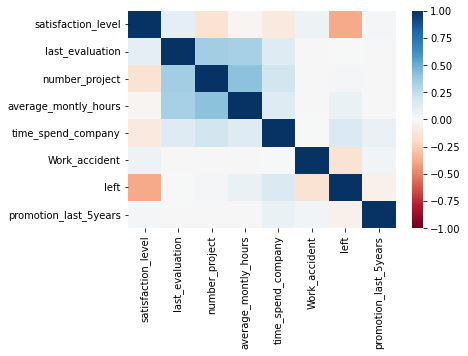

In [5]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette("RdBu",n_colors=128))


In [14]:
s1 = pd.Series(["X1","X1","X2","X2","X2","X2"])
s2 = pd.Series(["Y1","Y1","Y1","Y2","Y2","Y2"])
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = s.groupby(by=s).count().values/float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()
print("Entropy:",getEntropy(s2))
    

Entropy: 1.0


In [17]:
def getCondEntropy(s1,s2):
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d])
print("CondEntropy:",getCondEntropy(s2,s1))

CondEntropy: 0.4591479170272448


In [18]:
def getEntropyGain(s1,s2):
    return getEntropy(s2)-getCondEntropy(s1,s2)
print("EntropyGain:",getEntropyGain(s1,s2))

EntropyGain: 0.4591479170272448


In [20]:
def getEntropyGainRatio(s1,s2):
    return getEntropyGain(s1,s2)/getEntropy(s2)
print("EntropyGainRatio",getEntropyGainRatio(s2,s1))

EntropyGainRatio 0.5


In [21]:
def getDiscreteCorr(s1,s2):
    import math
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))
print("DiscreteCorr:",getDiscreteCorr(s1,s2))

DiscreteCorr: 0.4791387674918639


In [31]:
## 下面我们尝试实现基尼系数
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_arry = s.groupby(by=s).count().values/float(len(s))
    return sum(prt_arry**2)

In [32]:
def getGini(s1,s2):
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
    return 1- sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d])

## Gini系数不是symmetric的
print("Gini",getGini(s1,s2))

Gini 0.25
